In [57]:
import os
import numpy as np
import nibabel as nib
import glob
import matplotlib.pyplot as plt
from PIL import Image
import matplotlib.image as mpimg

In [16]:
classes = ['Alzheimer', 'Alzheimer _ 70', 'MCI'] #, 'MCI _ 70', 'Normal', 'Normal _ 70']

data = {}

for class_ in classes:
    dirs_ = os.listdir('/home/siddhant/SharedFolder/DATA/Data/' + class_)
    data_ = []
    for dir_ in dirs_:
        files_path = '/home/siddhant/SharedFolder/DATA/Data/' + os.path.join(os.path.join(class_, dir_), '*.nii')
        for file_ in glob.glob(files_path):
            data_.append(nib.load(file_))
    data[class_] = np.array(data_)

In [53]:
x = data['Alzheimer'][0].get_data()
y = x[:,:,:,0]
z=y[:,:,0]
img = Image.fromarray(z.astype('uint8'))

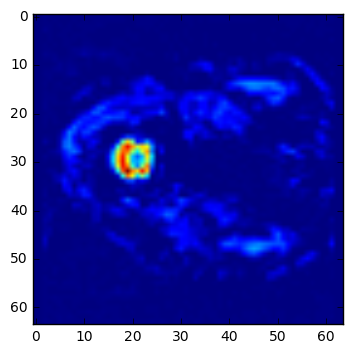

In [56]:
plt.imshow(z)
plt.show()

In [60]:
mpimg.imsave("out.tiff",z)

In [65]:
# import the necessary packages
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
 

def build(width, height, depth, classes, weightsPath=None):
    # initialize the model
    model = Sequential()

    #first layer
    model.add(Convolution2D(20, 5, 5, border_mode="same",
        input_shape=(depth, height, width)))
    model.add(Activation("relu"))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    #second layer
    model.add(Convolution2D(50, 5, 5, border_mode="same"))
    model.add(Activation("relu"))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    #set of FC
    model.add(Flatten())
    model.add(Dense(500))
    model.add(Activation("relu"))

    # softmax classifier
    model.add(Dense(classes))
    model.add(Activation("softmax"))

    #get model summary
    model.summary()
    if weightsPath is not None:
        model.load_weights(weightsPath)
    return model
    